## Homework

### Dataset

In this homework, we'll build a model for predicting if we have an image of a dino or a dragon. For this, we will use the "Dino or Dragon?" dataset that can be downloaded from [Kaggle](https://www.kaggle.com/datasets/agrigorev/dino-or-dragon). 

You can get a wget-able version [here](https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip):

```bash
wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip
unzip dino-dragon.zip
```

In [ ]:
!pip install wget
!python -m wget https://github.com/alexeygrigorev/dino-or-dragon/releases/download/data/dino-dragon.zip

### Data Preparation

The dataset contains around 1900 images of dinos and around 1900 images of dragons. 

The dataset contains separate folders for training and test sets. 


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline



In [2]:
test_dir = 'dino-dragon/test/'
train_dir = 'dino-dragon/train/'

### Model Creation

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Question 1

Since we have a binary classification problem, what is the best loss function for us?

- `binary crossentropy`
- `focal loss`
- `mean squared error`
- `categorical crossentropy`

In [4]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

Answer: `binary crossentropy`

### Question 2

What's the total number of parameters of the model? You can use the `summary` method for that. 

- 9215873
- 11215873
- 14215873
- 19215873

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

Answer: `11215873`

# Data Generators

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/val directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [8]:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 394 images belonging to 2 classes.


### Model fitting and Accuracy/Loss Evaluation


In [9]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
80/80 [==============================] - 12s 142ms/step - loss: 0.5937 - acc: 0.6807 - val_loss: 0.4702 - val_acc: 0.8274
Epoch 2/10
80/80 [==============================] - 11s 139ms/step - loss: 0.4419 - acc: 0.8143 - val_loss: 0.4085 - val_acc: 0.8299
Epoch 3/10
80/80 [==============================] - 11s 139ms/step - loss: 0.3797 - acc: 0.8469 - val_loss: 0.4207 - val_acc: 0.8020
Epoch 4/10
80/80 [==============================] - 11s 139ms/step - loss: 0.3306 - acc: 0.8701 - val_loss: 0.3253 - val_acc: 0.8655
Epoch 5/10
80/80 [==============================] - 11s 138ms/step - loss: 0.3087 - acc: 0.8714 - val_loss: 0.3417 - val_acc: 0.8655
Epoch 6/10
80/80 [==============================] - 11s 141ms/step - loss: 0.2672 - acc: 0.8971 - val_loss: 0.3176 - val_acc: 0.8579
Epoch 7/10
80/80 [==============================] - 11s 140ms/step - loss: 0.2279 - acc: 0.9184 - val_loss: 0.3740 - val_acc: 0.8401
Epoch 8/10
80/80 [==============================] - 11s 140ms/step - 

In [10]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [11]:
acc = history.history['acc']
val_acc= history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

In [12]:
mean_acc = np.median(acc)
std_acc = np.std(loss)

### Question 3

What is the median of training accuracy for all the epochs for this model?

- 0.40
- 0.60
- 0.90
- 0.20

Mean Acc 0.8842534422874451


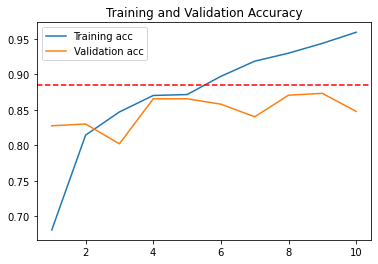

In [13]:

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.axhline(y=mean_acc, color='red', linestyle='--')

plt.title('Training and Validation Accuracy')
plt.legend()
print('Mean Acc',mean_acc)


Answer: `0.9`

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

- 0.11
- 0.66
- 0.99
- 0.33

Std acc 0.1307541023790047


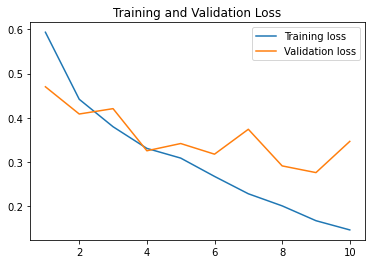

In [14]:
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and Validation Loss')
plt.legend()
print('Std acc',std_acc)

Answer: `0.11`

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=40,`
* `width_shift_range=0.2,`
* `height_shift_range=0.2,`
* `shear_range=0.2,`
* `zoom_range=0.2,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [17]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 1594 images belonging to 2 classes.


In [18]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 394 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
Make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

- 0.15
- 0.77
- 0.37
- 0.97

In [19]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
50/50 [==============================] - 16s 316ms/step - loss: 0.4177 - acc: 0.8137 - val_loss: 0.3145 - val_acc: 0.8528
Epoch 2/10
50/50 [==============================] - 16s 316ms/step - loss: 0.4055 - acc: 0.8250 - val_loss: 0.4072 - val_acc: 0.8147
Epoch 3/10
50/50 [==============================] - 16s 318ms/step - loss: 0.4063 - acc: 0.8149 - val_loss: 0.5549 - val_acc: 0.7538
Epoch 4/10
50/50 [==============================] - 16s 314ms/step - loss: 0.3619 - acc: 0.8469 - val_loss: 0.3491 - val_acc: 0.8426
Epoch 5/10
50/50 [==============================] - 16s 314ms/step - loss: 0.3595 - acc: 0.8463 - val_loss: 0.3433 - val_acc: 0.8401
Epoch 6/10
50/50 [==============================] - 16s 314ms/step - loss: 0.3488 - acc: 0.8494 - val_loss: 0.3200 - val_acc: 0.8503
Epoch 7/10
50/50 [==============================] - 16s 312ms/step - loss: 0.3635 - acc: 0.8369 - val_loss: 0.4432 - val_acc: 0.8096
Epoch 8/10
50/50 [==============================] - 16s 312ms/step - 

In [20]:
acc = history.history['acc']
val_acc= history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

In [21]:
mean_val_loss = np.median(val_loss)

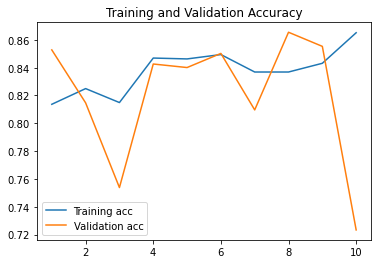

In [22]:

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')

plt.title('Training and Validation Accuracy')
plt.legend()


Mean Val loss 0.35556547343730927


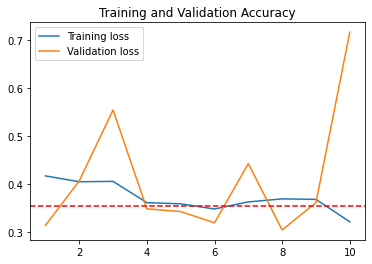

In [23]:
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.axhline(y=mean_val_loss, color='red', linestyle='--')

plt.title('Training and Validation Accuracy')
plt.legend()
print('Mean Val loss',mean_val_loss)


Answer: `0.37`

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

- 0.84
- 0.54
- 0.44
- 0.24

In [24]:
np.mean(val_acc[-5:])

0.820812177658081

Answer `0.84`